# About this document and the entire part 1 submission content: 
## Student and assignment details:
<table>
<tr>
<td width = "33%">
ST10036066 Zanokuhle Ncube 
Part 1 of 3 of the POE formatie assignment
PDAN8411 
25 April 2025
</td width= "33%">
</tr>
</table>

# submission content:
**Python notebook file is the application notebook file**

**ST10036066 Zanokuhle Azania Ncube PDAN8411 Part1 POE word document is the report**
**AI usage disclosure is a word document disclosing the use of AI**


## Comments key:
1. Block comments give a summay of a cell  
2.in line comments explain a line of code or lines of code. The in-line comments explained are above the code explained

# Software used: 
Github and visual studio code IDE

# About the dataset 
The following dataset used is accesssed form Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance/suggestions?status=pending. and it is based on a US client health insuranc data that is public and provided by the institution so the data has high varasity because it is collected by a trusted source


# Importing libraries 

Libraries in python are like toolkits that have ready made code to help with efficient programming instead of re-inventing the wheel. 
The libraries used for this project are :
1. pandas - helps to manipulate data such as loading and reading a cvs file
2. numpy- helps with the mathematical calculations and array manipulations
3. matplotlib - helps with plotting graphs and visualising data...cont
4.sklearn: 
5. sklearn.model_selection import train_test_split
6.sklearn.linear_model import inearRegression
7. sklearn.preprocessing import OneHotEncoder
8.sklearn.metrics import mean_squared error


In [128]:
#-------------------------------------------------------------------------Start-------------------------------------------------------

#pandas is responsible for data manipulatioon that is why when loading a dataset or reading from it, panda 'pd' is used. 
import pandas as pd
#numpy is responsible for arryas and math related programming so when we are doing 
import numpy as np
#matplotlib is usef for visuals such as hiistograms describing the data from the dataset so that is why plt is used when plotting graphs.
import matplotlib.pyplot as plt

import chart_studio.plotly as py

import plotly.graph_objects as go
#plotly.colors is used for accessing different colours to use on visuals.
import plotly.colors as pc

#seaborn is also a visualisation toolkit that is used to make visual illustrations. The difference is that seaborn is an extention of matplotlib and uses complex visuals.
import seaborn as sns

#sklearn.model_selction is used for splitting the dataset between training data and testing data during data preparations
from sklearn.model_selection import train_test_split

#sklearn.linear_model import LinearRegression is to access the linear model where the insurance medical data is fitted.
from sklearn.linear_model import LinearRegression 

#sklearn.import ElasticNet is the second model to compare accuracy scores with SLP model.
from sklearn.linear_model import ElasticNet

#sklearn library  mean squared_error is used to calculate the mean(average) squared error of the model.
from sklearn.metrics import mean_squared_error

#sklearn.metrics is used to calculate the accuracy score of the model.
from sklearn.model_selection import cross_val_score

#sklearn.model_selection is used to split the dataset into k-folds for cross-validation.
from sklearn.model_selection import KFold


In [129]:
#-------------------------------------------------------------Loading the data-------------------------------------------------------------------------

In [130]:

'''Loading the Medical Aid insurance dataset.
#insurance_df is a a variable that hold a datafram containing the data from the insurance cvs . 
#insurance_df is created using the pandas library that takes the cvs file and reads the data then organises it into a readable dataframe'''

#loading the data to tranform into a dataframe for analysis and visualisation.
insurance_df = pd.read_csv('insurance.csv')



In [131]:
''' using .shape helps to understand what is teh size of the insurance_df dataframe. The output being (1338,7) tells us that 
there are 1338 rows and 7 dimensions in the dataframe. '''
#to check the number of rows and colums (obseravtions and features) of the datafram, shape() is called 
print('The rows followed by the  columns shape of insurance_df dataframe. : ',insurance_df.shape)


The rows followed by the  columns shape of insurance_df dataframe. :  (1338, 7)


In [132]:
#using .size helps to get the total number of elements in the dataframe.

print('the toal number of elements of insurance client data is:',insurance_df.size)

the toal number of elements of insurance client data is: 9366


# Output
The output shows 9366 total elements of insurance_df dataframe. 
This is the number of rows by columns therfore when 1338 rows is divided by 7 colums, it gives the total number of elements. 
<strong><em> For instance:</em></strong>
<strong> 9366 rows / 7 coloms = 1338 data points with 7 dimensions</strong>
In an example , the nba.csv file is put into a dataframe and its element number was recieved using .size
[reference:] https://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/ accessed on 21 April 2025 

In [133]:
#-------------------------------CHECKING FOR DATA TYPES, MISSING VALUES, SUMMARY STATISTICS OF Insurance_df---------------------------------------------

To have a quick infomation overview of the data, using the info() method helps to check the different:
data types, dimen./column names,datapoint index denatoed as #, the data types and the null count value

It also assisits to have a simpleir views instead of scrolling through the output using .head() for example. 
The output confirms that there are inters, objects and floats types of data.

When looking at the tail of the dataframe, we can see that gender,smoker and region contain qualitative data. 
This means that the data contains non-numeric values which need to be encoded for the linear regression model. 

The dependent variable is 'charges',
while the independent variables are 'age', 'sex', 'bmi,'number of children', 'smoker','region' 
categorical variables are : 'sex' and region' and 'smoker'. Smoker describes the smoking habits of the clients. 
Numerical variables are: 'age', 'bmi', 'number of children', 'chargers' where  bmi and charges are continuous numeric data
and age and children are discrete numeric data'''

# Data Description based on .info() pandas method output:
## Categorical data types:
1. 'sex' : repreents a client's gender. A client is either male or female
2. 'smoker' : represents a client's smoking habits. A client is a smoker or not which is denaoted as 'yes' or 'no'
3. 'region' : rerpresents a client's geographic region. A client resides in the North-west, North-east, South-west, South-east
## Numerical data types:
### Discrete Data values :
'age' and 'number of children' is discrete becuase a client cannot be half an age and people are countaed as whole number and not decimals
### Continuious data values:
'bmi', 'charges' contain decimal format numbers therefore these data values are considered continuious.
# Data types available in the dataframe:
.Dtypes() method can be used to get the data types available in a dataframe however, using .info()
there is no need for dtypes() becuase info already gives output of a feature's data type as the Dtypes column on the info() output.
1. Int64 are numbers in this case discrete numbers of age and number of children per client
2. object are non-numeric string data types that consis of characters including special characters
3. float64 are continuius numbers in this case bmi and charges


In [134]:

#to check what are the data types present the datafram, 
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [135]:
#checking what are the different type of data type avaialbel in insurance_df dataframe
insurance_df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [136]:
#checking the number of times a data type occures in the dataframe
insurance_df.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

In [137]:
#to check the first 10  rows and colums of the dataframe, head() method is called and returns the data summary 
insurance_df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Ouput from the cell above(insurance_df.head(10)):
The output of the first 10 data points tell us that there is a variety of data as there are interger types and object types. This helps to have an ideas where and how encoding will be work and be used.

As .shape() showed that there are 1338 data points and 7 dimensions, tails() helps to check the last 5 data points to confirm that there are indeed 1338 data points.

Currently, the output is showing the last data point is 1337, so the data points follow a zero type indexing, starting from 0 and ending with 1337


In [138]:

#to check the data summary from the bottom observations and features of the dataframe, tail() method is called 
insurance_df.tail(10)


,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [139]:
#.describe() method helps to get a summary of data. Pandas library's responsibility to be able to get the mean, maximmum, standard diviation of the data 
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [140]:
#checking if there  are missing/null values in the dataframe.

insurance_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on isnull().sum() output , there are no missing values as there is 0 indicated for each feature's data point. 
# Ouput 
The age shows 0 , sex and 0, bmi and 0 etc meaning based on the output there are missing values in the dataframe.
<em>age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64</em>

In [141]:
'''checking if there are duplicates iin each dimension of the dataframe'''
insurance_df.nunique()
'''the output shows that there are duplicates in the dataframe but in this case for age for example,
it makes sense becuase  clients can have the same age, the same applied for gender,bmi,children,smoker,region,chargers'''

'the output shows that there are duplicates in the dataframe but in this case for age for example,\nit makes sense becuase  clients can have the same age, the same applied for gender,bmi,children,smoker,region,chargers'

In [142]:
#checking the categorical varible data 'sex' data distribution count. 

gender_count=insurance_df['sex'].value_counts()

print('The gender count of clients is',gender_count)

The gender count of clients is sex
male      676
female    662
Name: count, dtype: int64


In [143]:
#checking if the categorical varibles data 'smoker' data distribution count.
insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [144]:
#checking if the categorical dta variable 'region' data distribution count.
insurance_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [145]:
'''values counts help to check if all values are correctly recorded due to human error
Based pn the output, every client entered their ages correctly,
chose between two gender options, bmi and chider number is correctly recorded.
region values are either northwest,northeast, southeast, south east '''
#cehcking hwo many values are recorded for each dimension.
insurance_df.value_counts()


age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [146]:
#

In [147]:
#-----------------------------------------Analysing the distribution, spread, central tendency of insurance data--------------------------------------------
'''the foolowing cells display graphs representing the spread of the data, the central tendency and the distribution of the data.
Think of it as showing graphs for the describe() method used previously.'''

'the foolowing cells display graphs representing the spread of the data, the central tendency and the distribution of the data.\nThink of it as showing graphs for the describe() method used previously.'

# Analysing the distribution , spread and central tendency of insurance client data before one-hot encoding
The following cells below represent visuals and statistics of the dataframe before consverting categorical data into encoded categories
Thsi means that 'sex' data remains as Female and Male, 'smoker' remains Yes and No and 'region' remains as northwest, southwest, northeast, noethwest.
When the data is encoded, a markdown section will indicate the changes
The order is age, gender, bmi, number of children,smoker, region, chargers

# AGE : Everything about age data distribution

# Analysing the distribution of data for the age feature
A histogram showing the distribution of the client ages using seaborn library tools. 
The output shows that there are more clients around between 15 years and the early 20 years.  
# Analysing the average age
Using .mean() help to return the average of a dataframe's data points. The average client age is 30.
This suggests that people are most likely to consider a medical insurance aid if they are in their 30s.

Text(0.5, 1.0, 'Distribution of the Age of the Health Insurance Clients')

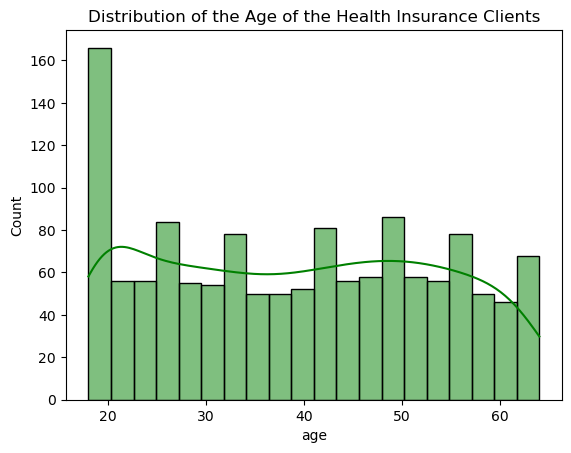

In [148]:
#green histogram showing the distribution of the health insurance client's age

sns.histplot(insurance_df['age'] , kde=True,color='green',bins=20).set_title('Distribution of the Age of the Health Insurance Clients')
#setting the x and y axis lable for better interpretation of the histogram


In [149]:
#checking the average age of the clients
avg_client_age=insurance_df['age'].mean()

print('The average age of the health insurance client is', avg_client_age)

The average age of the health insurance client is 39.20702541106129


In [150]:
#checking the youngest and oldest clients 

#oldest variable hold the highest recored age found in the dataframe
oldest=insurance_df['age'].max()

#youngest variable hold the lowest recored age found in the dataframe
youngest=insurance_df['age'].min()
print('The oldest client age is: ' ,oldest, 'and the youngest client age is:', youngest)

The oldest client age is:  64 and the youngest client age is: 18


# GENDER distribution
Using groupby() features 'sex' and 'charges' data is grouped together so it can be analysed. 
In this case groupby() is used to see the average charges based on gender of the clients. Based on the output, the average charges that female client pay is 12569.57 and the average charges for male clients is 13956.
### using.corr 
the output for checking the corrolation between sex and charges suggests that there is no corrolation as the output shows 0 for female and male clients

# using the countplot histogram
Based on the graph, there is an equal distribution of female and male clients as the two historgam bars are almost the same height.
# references:
[1] Accesed on 22 April 2025 Website: moneymagazine.co.za  https://moneymagazine.co.za/the-impact-of-gender-on-health-insurance-premiums-in-south-africa/

In [151]:
insurance_df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [152]:
#checking corrolation between target varaible(charges) and the 'sex'
insurance_df.groupby('sex')['charges'].corr(insurance_df['age'])

sex
female    0.324575
male      0.282369
Name: charges, dtype: float64

Text(0.5, 1.0, 'The distribution of client gender of the health insurance')

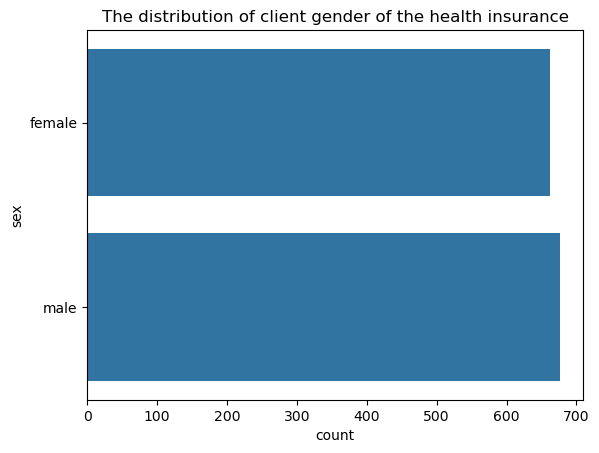

In [153]:
#checking for the data distribution of gender of the health insurance clients
#using seaborn library to plot the data
sns.countplot(data=insurance_df['sex']).set_title('The distribution of client gender of the health insurance')

# BMI distribution
Checking for data points that are diviating away from the rest of the data points using a histogram and a boxplot.
This is important to know because they effect the average seen on the .descrbine() method output 
even model performance. To check for outliers, we use a boxplot thanks to seaborn python library. 


Text(0.5, 1.0, 'Distribution of BMI of clients')

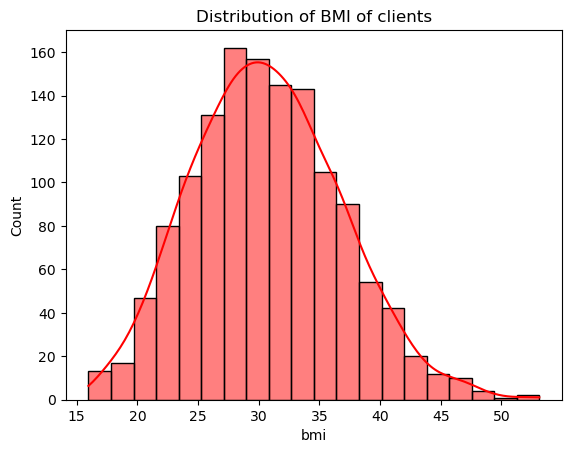

In [154]:
#checking the distribution of the client's BMI using a histogram
sns.histplot(insurance_df['bmi'] , kde=True,color='red',bins=20).set_title('Distribution of BMI of clients')


<Axes: ylabel='bmi'>

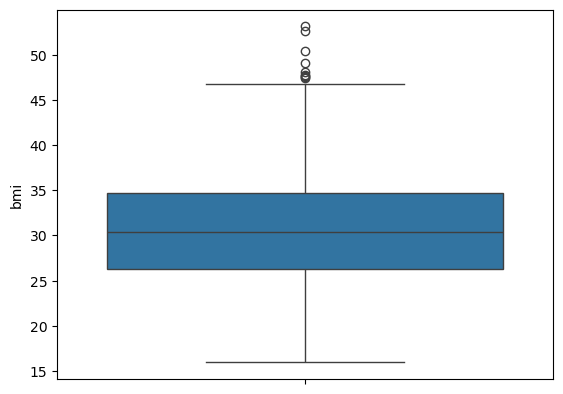

In [155]:

#using the boxplot: the code means that insurance dataframe 's bmi data is plotted on a box and whisker plot(boxplot)

sns.boxplot(insurance_df['bmi'])


In [156]:
#checking the average bmi of the clients
insurance_df['bmi'].mean()

30.66339686098655

# number of children distribution
#using a paiplot for checking whether a clients number of children/dependents has an effect on the amount of insurance chargers and other feature of the dataframe. The paiplot will also show feature such as sex,age,bmi,smoking habits. 


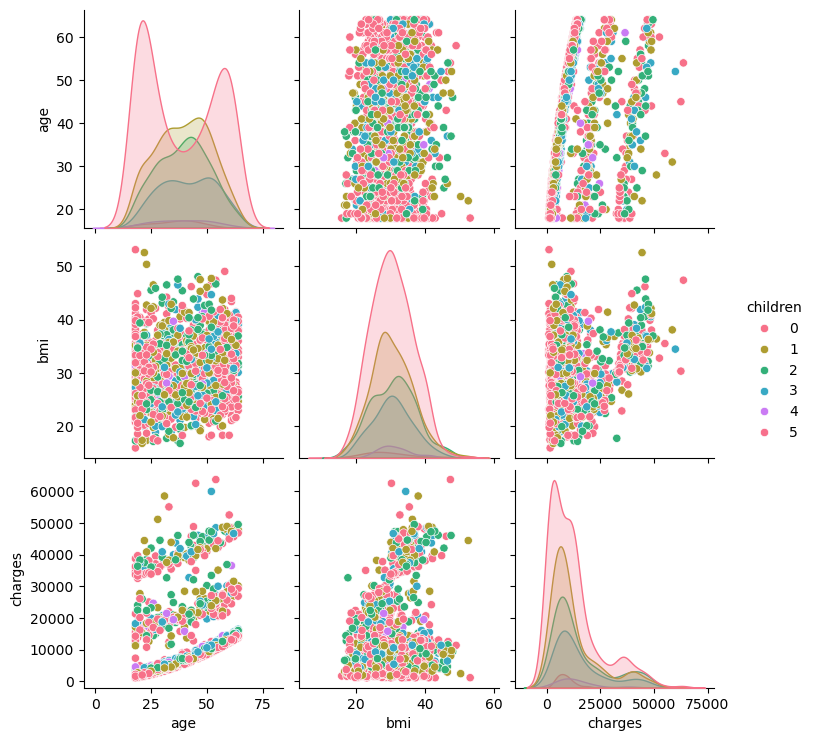

In [157]:
#Using a paiplot by seaborn, checking if the number of children has an effcet on health insurance chargaes. 
sns.pairplot(insurance_df, hue='children', palette='husl',diag_kind='kde')

# smoking habits distribution

In [158]:
insurance_df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Text(0.5, 1.0, 'The distirbution of smoking habits between male and female clients')

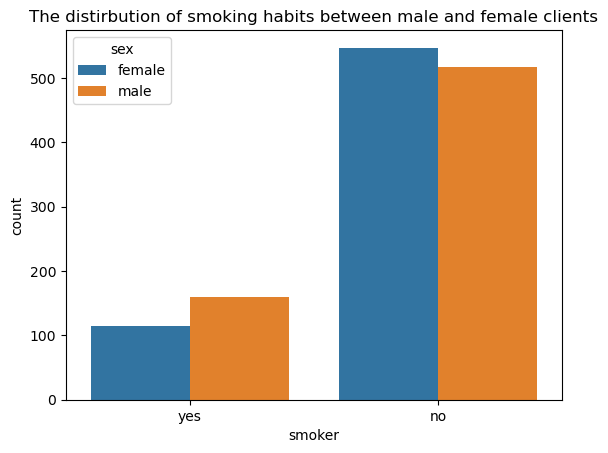

In [159]:
#checking smoking habit count according to the client's gender
sns.countplot(x='smoker', hue="sex",data=insurance_df).set_title('The distirbution of smoking habits between male and female clients')

<Axes: xlabel='smoker', ylabel='charges'>

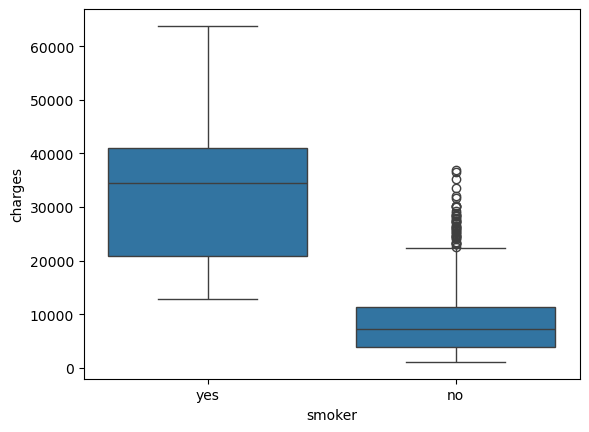

In [160]:
'''using boxplot by seasborn library o check teh corrolation between'
target and feature variables. In this case, smoker and chargers are plotted ont he graph
A client smoking habits does affect their insurance charges,
with a few outliers outside the average chargers. 
The average nonn-smoker pays 5 - 15 000 between  and the ourliers are betweeen 20 000 - 40 000
The average smoker pays betwween, 20 - 40 000 and the outliers are between 0- 15 000'''
sns.boxplot(x='smoker',y='charges', data=insurance_df)

# Client region distribution 
To analyse client dustrubution accoring to region, first the average charges per region is retuned after using the groupby method.
The groupby method gets data values from region and charges dimensions then claculates the charges accoring to the region input.


In [161]:
#checking for corrolation between target charges and the featire region which is the dependent variable
insurance_df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Text(0.5, 1.0, 'The average charges for health insurance based on the  client region ')

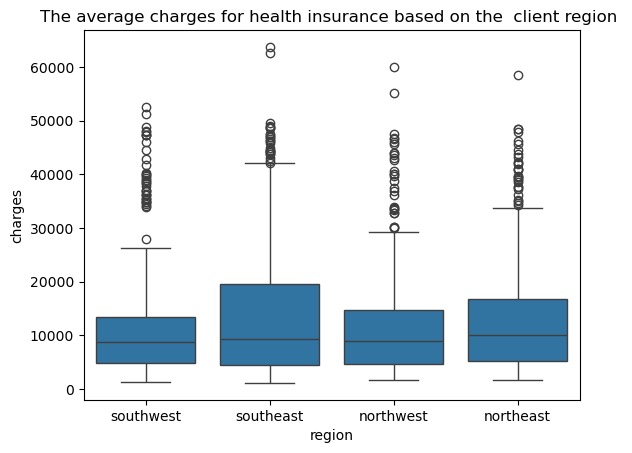

In [162]:
#checking for the corroloation between target variable carges and dependent variable region

sns.boxplot(x='region',y='charges', data=insurance_df).set_title('The average charges for health insurance based on the  client region ')

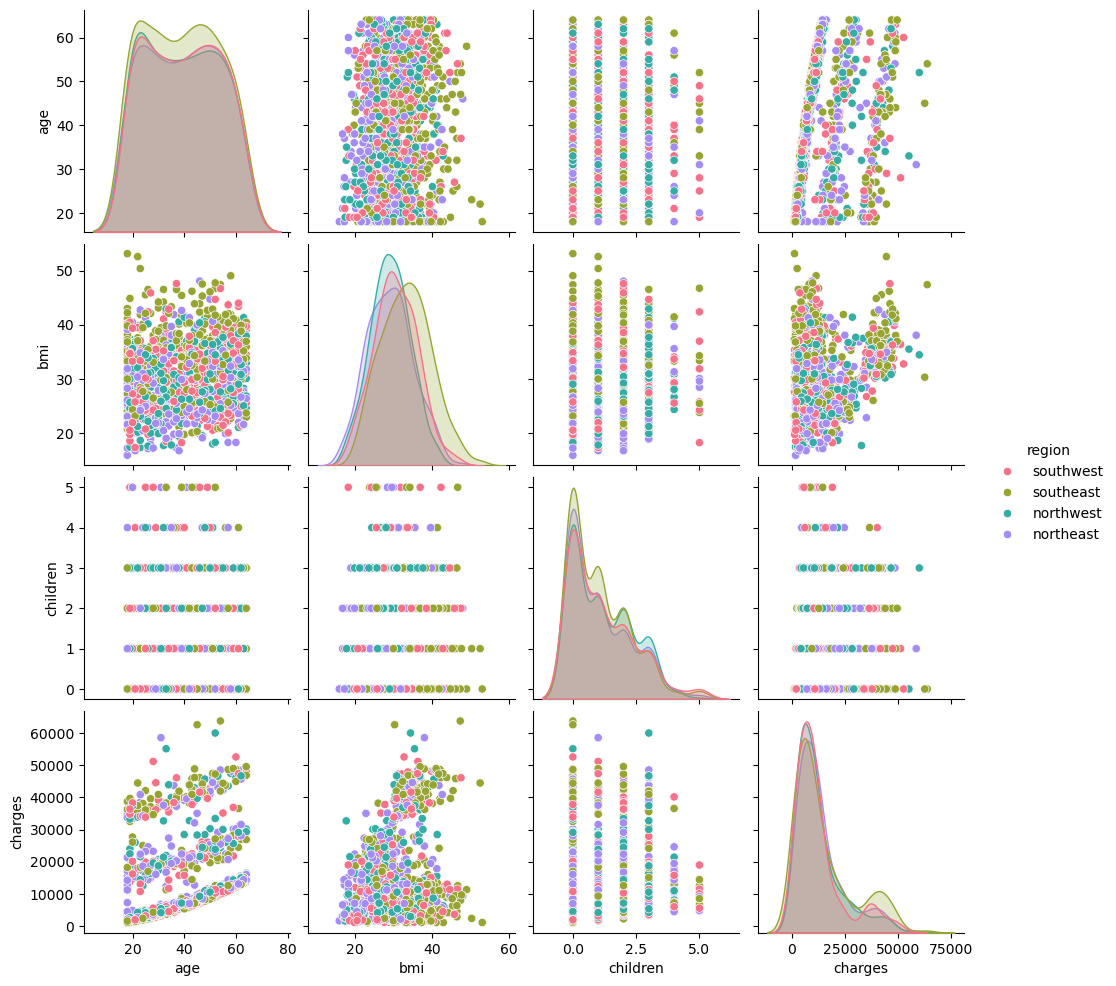

In [163]:
sns.pairplot(insurance_df, hue='region', palette='husl', diag_kind='kde')

# 'Charges' distribution
The charges recored are in US dollar currency. Based on the histogram output, the count of client who pay between 0-10 000 USD increased and decreases as the charges get between 20 000 - 60 000 USD.  

Text(0.5, 1.0, 'Distribution of the client Charges of the Health Insurance')

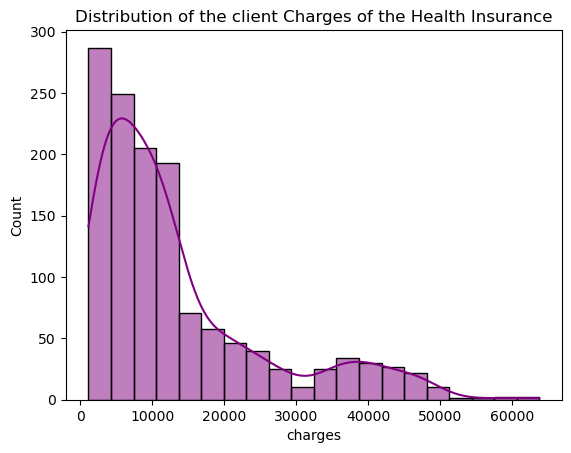

In [164]:
#purple histogram showing the distribution of the healh insurance charges for clients
sns.histplot(insurance_df['charges'] , kde=True,color='purple',bins=20).set_title('Distribution of the client Charges of the Health Insurance')

<Axes: xlabel='sex', ylabel='charges'>

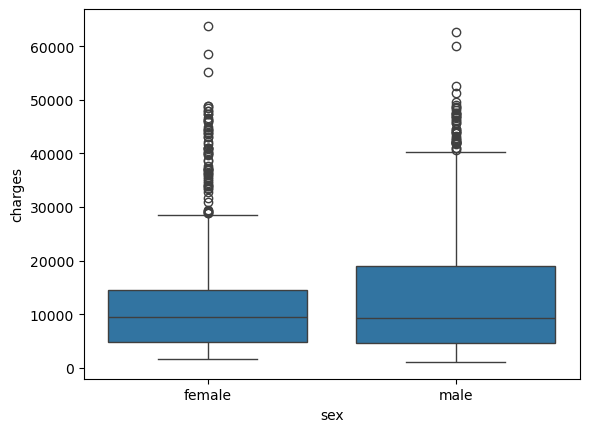

In [165]:
#checking for the corrolation between target variable chargers and depedndent varaible gender
sns.boxplot(x='sex',y='charges', data=insurance_df)

# ------Feature engineering------ 
One hot encoding is used.Sex is endoded as 1 = Female and 0= Male,
Smoking habits (Smoker) is encoded as 1= Yes and 0= No,
Region is encoded as 1=Northwest, 2= Northeast, 3=Southeast, 4= Southwest

# Feature engineering
## The concept of feature engineering and why its important and why its used
 The code below creates a new feature called 'client_age_category. Loc is used to access the dataframe's age values by age range.
The loc method is used to access a group of rows and columns by labels or a boolean array. For instance, 'youth' is created by taking values that are 
greater than or equal to 18 and less than or equal to 24. client_age_category is then the new feature creating thanks to feature engineering. 
After feature engineering, encoding these categories is implemented to convert the label into a number for our linear regression model  

The following websites provide tutorial on how to perfrom feature engieering and [2] is a link tutorial of what to consider before doing linear regression

[2] DataCamp,2025.One Hot-Encoding Tutorial avavailable at: < https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial >[Accessed 23 April 2025] 

[3] SaturnCloud,2025. Linear Regression with sklearn using categorical variables . Available at:<https://saturncloud.io/blog/linear-regression-with-sklearn-using-categorical-variables/#:~:text=To%20use%20categorical%20variables%20in,label%20encoding%2C%20and%20binary%20encoding.> 
 [Accessed 23 April 2025]


In [166]:


#creating Youth type age_client_category 
insurance_df.loc[(insurance_df['age']>= 18) & (insurance_df['age']) <= 24,'client_age_category'] = 'Youth'

#creating Adult type  client_age_category
insurance_df.loc[(insurance_df['age']>= 25) & (insurance_df['age']) <= 63,'client_age_category'] = 'Adult'

#creating Senior type client_age_category
insurance_df.loc[(insurance_df['age']>= 64) , 'client_age_category'] = 'Senior'

In [167]:
#Feature engineering for bmi_category. These categories are based the the National Library of Medicine BMI Categories

#accessing bmi values that are less than or  equal to 17 for the underweight category
insurance_df.loc[(insurance_df['bmi']>= 17) ,'bmi_category'] = 'underweight'

#accesing bmi values that are less than or equal to 18 and greater than or equal to 24 for normalweigt 
insurance_df.loc[(insurance_df['bmi']>= 18) & (insurance_df['bmi']) <= 24.9,'bmi_category'] = 'normalweight'

#accessing values that are less than or equal to 18 and greater than or equal to 24 for overweight category
insurance_df.loc[(insurance_df['bmi']>= 25) & (insurance_df['bmi']) <= 29.9,'bmi_category'] = 'overweight'

#then, creating the obese bmi_category using bmi values greater than or euqal to 18 and than or equal to 24
insurance_df.loc[(insurance_df['bmi']>= 30) ,'bmi_category'] = 'obese'

In [168]:
insurance_df_encoded=pd.concat([insurance_df, insurance_df['client_age_category'], insurance_df['bmi_category']], axis=1)
insurance_df_encoded.drop(['client_age_category','bmi_category'], axis=1, inplace=True)
#print(insurance_df_encoded.head(10))
print(insurance_df.tail(10))

      age     sex     bmi  children smoker     region      charges  \
1328   23  female  24.225         2     no  northeast  22395.74424   
1329   52    male  38.600         2     no  southwest  10325.20600   
1330   57  female  25.740         2     no  southeast  12629.16560   
1331   23  female  33.400         0     no  southwest  10795.93733   
1332   52  female  44.700         3     no  southwest  11411.68500   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     client_age_category bmi_category  
1328               Adult   overweight  
1329               Adult        obese  
1330               Adult   overweight  
1331               Adult        obese  
1332               Adult     

In [169]:
#having the look at the first 10 rows of the dataframe to check whether the new features are created correctly 
insurance_df.head(15)

,age,sex,bmi,children,smoker,region,charges,client_age_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Adult,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Adult,obese
2,28,male,33.000,3,no,southeast,4449.46200,Adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,overweight
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight
5,31,female,25.740,0,no,southeast,3756.62160,Adult,overweight
6,46,female,33.440,1,no,southeast,8240.58960,Adult,obese
7,37,female,27.740,3,no,northwest,7281.50560,Adult,overweight
8,37,male,29.830,2,no,northeast,6406.41070,Adult,overweight
9,60,female,25.840,0,no,northwest,28923.13692,Adult,overweight


In [170]:
#using value count to check the new features(age_category and bmi_category)
client_age_count= insurance_df['client_age_category'].value_counts()

client_bmi_count=insurance_df['bmi_category'].value_counts()


print('The client age category count is:',client_age_count, 'The client bmi category count is:',client_bmi_count)

The client age category count is: client_age_category
Adult     1316
Senior      22
Name: count, dtype: int64 The client bmi category count is: bmi_category
obese         707
overweight    631
Name: count, dtype: int64


In [171]:
print('The total null values are:\n',insurance_df.isnull().sum())
print('The summary of the dataframe after feature enegineering: \n,',insurance_df.info())

The total null values are:
 age                    0
sex                    0
bmi                    0
children               0
smoker                 0
region                 0
charges                0
client_age_category    0
bmi_category           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   sex                  1338 non-null   object 
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   int64  
 4   smoker               1338 non-null   object 
 5   region               1338 non-null   object 
 6   charges              1338 non-null   float64
 7   client_age_category  1338 non-null   object 
 8   bmi_category         1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB
The summary of 

# Using One-hot encoding for the 'sex' feature

# Using One Hot encoding 
To convert female as 0 and male as 1 , One-hot encoding is used as shown on the cell below. The following sources have been used to follow a step by step example provided by the authors. The reason label  encoding is not used becuase the model will assume the numbers are ranked and that does not align witht the values meaning the perpose of using this data and providing insight for the medical insurance. To clarify the previous statment "For example, assigning 1 to Red, 2 to Green, and 3 to Blue could make the model think that Green is greater than Red and Blue is greater than both" and lets assume we use label encoding for gender where female is zero and male is one. The model will assume that male being 1 and ,the male clients are given more priotiry iin a sense that the model puts 1 as  higher importance, so in a way one-hot encoding avoid ordinality in our dataset. The aim is to change the charges depedning on the type of client not just their gender. 

Right after encoding , the varibale encoded_data holds the array of the encoded features but it cannot be used as a dataframe. If it is not converted into a data or concatinated, performing pandas methods would result in an IDE interpretter error message.

# observations during encoding
First round involved using sklearn library's One-Hot encoder to tranform the categorical feature created during feature engineering. 
The problem was the results of having too many columns to work with therefore concat was used but the corrolation map output showed layers of dupliacted data. When using Panda's library it was faster to encode and by dropping the original data inplace of the manipulated one for data preparation purposes.
Th etutrial to perfrom One-Hot encoding using Pandas did not include dropping the original data so that is why 'age' appeared twice. As the assignemnt progresses, observations are likely to change too.

references
[1] https://saturncloud.io/blog/linear-regression-with-sklearn-using-categorical-variables/#one-hot-encoding [Accessed 23 April 2025]

In [172]:
#-----------------------------------------Encoding the categorical variables---------------------------------------------------
#separating the features and the target variables
#X=insurance_df[['sex','smoker','region','client_age_category','bmi_category']]
#y=insurance_df['charges']

#cassigning the variable encoder so that sklearn's onehot encoder can be used for fitting the data and tranforming it into a one hot encoded data. 
#encoder= OneHotEncoder(sparse_output=False,drop='first')

#using sklearn's one hot encoder by assigning encoded_data to the encoder variable so that it hold the encoded data
#encoded_data =encoder.fit_transform(insurance_df[[['sex','smoker','region','client_age_category','bmi_category']]])
encoded_data=pd.get_dummies(insurance_df, columns=['sex','smoker','region','client_age_category','bmi_category'])

#converting the encoded data variable into a dataframe for manipulation and analysis
#encoded_data=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

#using .drop method to drop the original categorical data from the dataframe becuase we need numeric data to use the corrolation maps later
insurance_df.drop(['sex','smoker','region','client_age_category','bmi_category'], axis=1, inplace=True)

#using pandas' concat method to combine the original unencoded data with the new encoded data
#insurance_df=pd.concat([insurance_df,encoded_data], axis=1)


#printing the encoded data to check if one-hot encoding has been implemented successfully
print('The data summary after encoding was implemented:\n',insurance_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB
The data summary after encoding was implemented:
 None


# using .info to see if one hot encoding was implemented successfully
Based on .info() ouput, the encoding resulted in creating many columns that need grouping.

In [173]:
#removing duplicates shown on the output of .info()

#using .drop_duplicates to remove duplicates in the dataframe
insurance_df.head(5)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [174]:
#using info to check the summary of the dataframe to confirm encoding was successfull
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


# flattening the 2 dimensional data


# Analyzing corrolations
Now that feature engineering including data encoding has been implemented and confirmed using pandas library methods, the following step involves using graphs to analyse correlations. This measn that graphs such as corrolation maps are used to analyse the relation between the variables in the dataframe. A tutorial by Geeks For Geeks says(2022),"It is very easy to understand the correlation using heatmaps it tells the correlation of one feature(variable) to every other feature(variable)" [1] therefore after feature engineering, corrolation measurement analysis is implement. The aim is to check which feature affcet the insurance price the most and why it affcets the charges. The corrolation maps used are provided by seaborn which is one of the libraries used.
Seaborn has documentation on how to use heatmaps in different ways and how to make it look. [2]

[1] https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/ [accessed 24 April 2025] by GeeksforGeeks.org plotting-correlation-matrix-using-python
[2] https://seaborn.pydata.org/generated/seaborn.heatmap.html [accessed 24 April 2025] by Michael Waskom Seaborn.Heatmap , year 2024



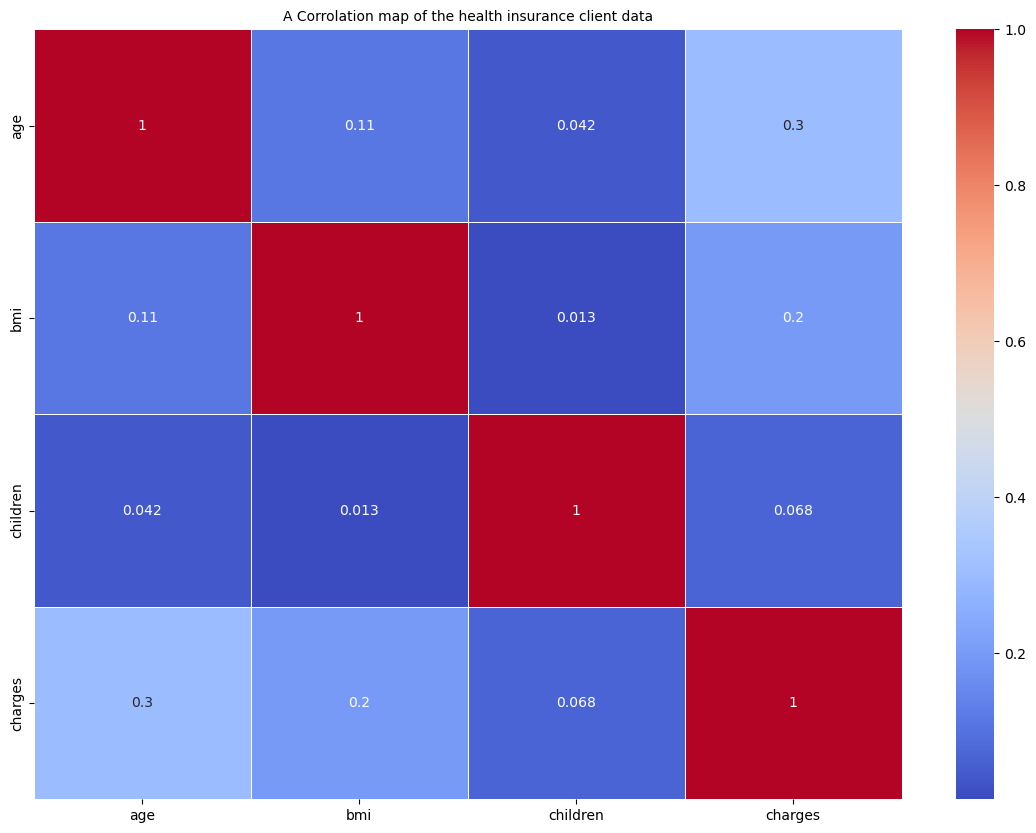

In [175]:
#---------------------------------------Corrolation interpretation ---------------------------------------------------
#using seaborn library to plot the corrolation map of the dataframe

#the plot size is adjusted to display the corrolation map better instead of the number overlapping each other
plt.figure(figsize=(14,10))

#using sns.heatmap to plot the corrolation map of the dataframe
axis = sns.heatmap(insurance_df.corr(),annot=True,cmap='coolwarm',linewidth=.5)

#setting the title to label what the corrolation map is about
plt.title('A Corrolation map of the health insurance client data', fontsize=10)
plt.show()


#Discussing the corrolation map 

A corrolation heatmap that measures the  association between target and feature or two variables and 
The matrix shows scale of relatability from closest to furthest between a tareget and features. Accoring to Orakzai(2025),"They show how strongly pairs of variables are related to each other,  with values typically ranging from -1 to +1."[1] so the negative 1 represent a negative corrlation and the positive 1 reprents a positive correlation.  Looking at the map and the matrix closest to 1 , it is clear that smoking habits and charges are closey associated  becuase for smoker_yes which represent a client that smokes, is most likey to have their health insurance charges are affected. This statemnet is written becuase when looking at feature region_northeast for example, the matrix between charges and region_northeast is 0.0063 which is not close to 1. 
 This makes bmi and charges have a positve corrolation,therefore if the client has a BMI that falls under obese based on the data, the health insurance charges increases while bmi_category_overwight and charges has  negative corrolation suggesting that there are not lot of clients who pay higher health insurance becuase their BMI falls under the obese range. 
 age and charges have a positive corrolation so this suggest that based on the data the older the client the more they need medical service the more they use medical aid and the more they pay for health insurance,
smoker_yes and charges has positive corrolation, smoker_no and charges has a negative corrolation therefore based on the data smoking clients visit health services more so they are most likey to pay higher for health insurance. The closer the matrix is to 1 the stronger the corrolation. 

Accoring to 
[1] https://www.baeldung.com/cs/heatmap-explanation [accessed 25 April 2025] by Rahmat Ullah Orakzai and Milos Simic How to Interpret Heatmaps? Baeldung.com 2025 


In [176]:
#----------------------------------------------------Data preparations(splitting the data)--------------------------------------------

In this section , the dataframe is split as the training and testing by 80%(training) and 20%(testing). 

The testing set will be kept safe and separete from the training becuase the testing set needs to be used for our model. 
To perfrom random splitting, scikit learn(sklearn) library is used as accoring to Wijaya(2025),"This technique evaluates our model’s ability to generalize and ensures that it is not simply memorizing patterns from the training set."[1] hence we need to prepare the health insurance data by splitting it in a manner that ovefitting or underfitting chances of occurance is minimal as possible. The linear regssion model needs to be trained(using the training data) instead of being programmed.

The pandas dataframe insurance_df is split where 
    the test_size is0.2(20%) meaning the other 80% is the training dataframe, 
    random state determines the random amount of times the data is shuffled befoe splitting ,
    train_size is the testing set size as 20%,
    shuffling the data to make sure that it is not in a particular order and that the linear regssion model therefore makring it as True
    the testing set is left alone for now

[1] https://www.statology.org/understanding-train-test-splits/#:~:text=Train-test%20splits%20are%20a%20technique%20used%20to%20divide,to%20evaluate%20the%20model%E2%80%99s%20performance%20on%20unseen%20data. 2025 Understanding Train-Test Splits  Cornellius Yudha Wijaya  Cornellius Yudha Wijaya [accessed 26 April 2025]

In [177]:
#using sklearn library to split in a 80 % training data and 20% testing data 

X_train, X_test, y_train, y_test = train_test_split(insurance_df, insurance_df,random_state=104,test_size=0.2, shuffle=True)

#at this point the testing data is left alone and will be used for prediction by the linear regression model

#checking the head() of the training data
print('The x training data is:\n',X_train.head(10))
print('The y training data is:\n',y_train.head(10))

The x training data is:
       age     bmi  children      charges
516    20  35.310         1  27724.28875
622    49  21.300         1   9182.17000
1168   32  35.200         2   4670.64000
1097   22  33.770         0   1674.63230
363    21  26.400         1   2597.77900
1268   20  33.300         0   1880.48700
991    38  27.835         2   7144.86265
1310   42  26.315         1   6940.90985
905    26  29.355         2   4564.19145
444    56  26.695         1  26109.32905
The y training data is:
       age     bmi  children      charges
516    20  35.310         1  27724.28875
622    49  21.300         1   9182.17000
1168   32  35.200         2   4670.64000
1097   22  33.770         0   1674.63230
363    21  26.400         1   2597.77900
1268   20  33.300         0   1880.48700
991    38  27.835         2   7144.86265
1310   42  26.315         1   6940.90985
905    26  29.355         2   4564.19145
444    56  26.695         1  26109.32905


In [178]:
#-------------------------------------------------------Data fitting and prediction---------------------------------------------------

In this section Linear Regression() and ElasticNet() are used as models to predict medical aid health inusurance charges for a client
The following guides for data fitting have been used: 
 simple Linear Regression is avaialiable on Scikit-learn developers website as [3]
 ElasticNet() is available on Medium as [4]
The Linear Regression() model used to find the predicted y taget value based on the features in the dataset. Accoring to the scikit learn developers website(2025),"LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation."[2] so the algorithm calculates the slope and intercept evenly resulting in the best fit line. 
ElasticNet defined "It is a regularized regression technique that is used to deal with the problems of multicollinearity and overfitting, which are common in high-dimensional datasets."[1] hence this model is the alternative for when the prediction score for the simple Linearregression model is not up to standard in term of the South African medical aid objectives. 

LinearRegression from sklearn library(scikit learn) is used as the first model. It prediction scores will determine if anotheer  model such as teh EleastciNet() should be considered or the is some addional data changes need in the dataframe. 

The difference between using ElasticNet() compared to choosing Lasso() or Ridge() models is that Lasso algorithm can cause underfitting of data due to not enough data and Ridge() impacts overfitting of data. What if the 20% split of test data is not enough? therefore Ridge() algorithm would help but this would mean that the data is ovefitting where the is an overwhelming high number of features available. To mitigate this temporal confusion, ElasticNet() is used.
[1] https://medium.com/@shruti.dhumne/elastic-net-regression-detailed-guide-99dce30b8e6e Shruti Dhumne 2023 Elastic Net Regression detailed guide Medium [accessed 26 April 2025]
[2] 2025 scikit-learn developers (BSD License) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html [accessed 26 april 2025]
[3] https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html
[4] https://medium.com/@shruti.dhumne/elastic-net-regression-detailed-guide-99dce30b8e6e 

In [179]:
#checking the shape of the training data
print('The shape of the training data is:',X_train.shape)
print('The shape of the testing data is:',y_train.shape)

The shape of the training data is: (1070, 4)
The shape of the testing data is: (1070, 4)


In [180]:
#using the imported LinearRegression to create a linear regression object
insurance_lr=LinearRegression() 

#training the model using the train set
insurance_lr.fit(X_train, y_train)

#checking the coefficients of the model
print('The coefficients of the model are:',insurance_lr.coef_)

#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_train, y_train))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_train, y_train))

#checking the score of the linear regression model based on only the training data
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good. \nThe score is:', insurance_lr.score(X_train, y_train))


The coefficients of the model are: [[ 1.00000000e+00  5.40821187e-17 -1.24111873e-16 -5.53094012e-15]
 [ 4.00662052e-14  1.00000000e+00 -6.23554468e-14 -2.22044605e-16]
 [ 1.36045697e-17 -4.59752543e-17  1.00000000e+00 -9.55114351e-18]
 [ 1.48383098e-13 -8.15791878e-13  3.87620146e-13  1.00000000e+00]]
The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0


## Simple Linear Regressio() model output explained using training
More details are dicussed in the report word document 

If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0

references: [1] https://dataaspirant.com/linear-regression/#t-1697350902759 by Saimadhu Polamuri An in-depth guide to linear regression 

In [181]:
#testing the model
insurance_lr.predict(X_test)
#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_test, y_test))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_test, y_test))

#checking the score of the linear regression model based on only the testing data
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good. \nThe score is:', insurance_lr.score(X_test, y_test))

#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_test, y_test))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_test, y_test))

#checking the score of the linear regression model based on only the testing data
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good. \nThe score is:', insurance_lr.score(X_test, y_test))


The mean squared error of the model is: 0.00


The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0
The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0


## evaluating the Simple Linear Regression() model
After training and testing  the model and training it, the R-Squared is used for checking how the model'sprediction are diviating away from the original data. This techniques of evalutation is defined as(Polamuri,2023),"It provides a percentage which indicates the proportion of the dependent variable’s variation that the model explains." [1]. Based on the output of the Coefficient of Determination  it is 1.00(100%) and the score being 1 suggests that threre needs to be addional modification such as mitating the underfitting issue

references: [1] https://dataaspirant.com/linear-regression/#t-1697350902759 by Saimadhu Polamuri An in-depth guide to linear regression 

### Using cross-validation 
Cross-validation is a method whre the the data is split into folds(the kfold imported in the library cell). Polamuri explains this method as (2025)"each time with a different fold as the test set, ensuring robustness and reliability across various scenarios."

### cross vaidation model evaluation
The output remains the same as :
The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0
Which mean its still 'good'. The next solution is to mitatigate a possible underfitting 

In [182]:
#using cross validation to check the accuracy of the model again

#using the sklearn library to import the cross_val_score method for cross validation
cross_val_score(insurance_lr,X_train,y_train,cv=5, scoring='neg_mean_squared_error')

#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_train, y_train))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_train, y_train))

#checking the score of the linear regression model based on only the training data
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good. \nThe score is:', insurance_lr.score(X_train, y_train))

The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0


In [183]:
#predicting the model using the test data
y_pred=insurance_lr.predict(X_test)

#using cross-validation here as well 
cross_val_score(insurance_lr,X_test,y_test,cv=15, scoring='neg_mean_squared_error')

print('The mean squared error of the model is: %.2f'% mean_squared_error(X_test, y_test))
#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_test, y_test))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_test, y_test))

#checking the score of the linear regression model based on only the testing data
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good. \nThe score is:', insurance_lr.score(X_test, y_test))

#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_test, y_test))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_test, y_test))

#checking the score of the linear regression model based on only the testing data
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good. \nThe score is:', insurance_lr.score(X_test, y_test))


The mean squared error of the model is: 0.00
The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0
The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0


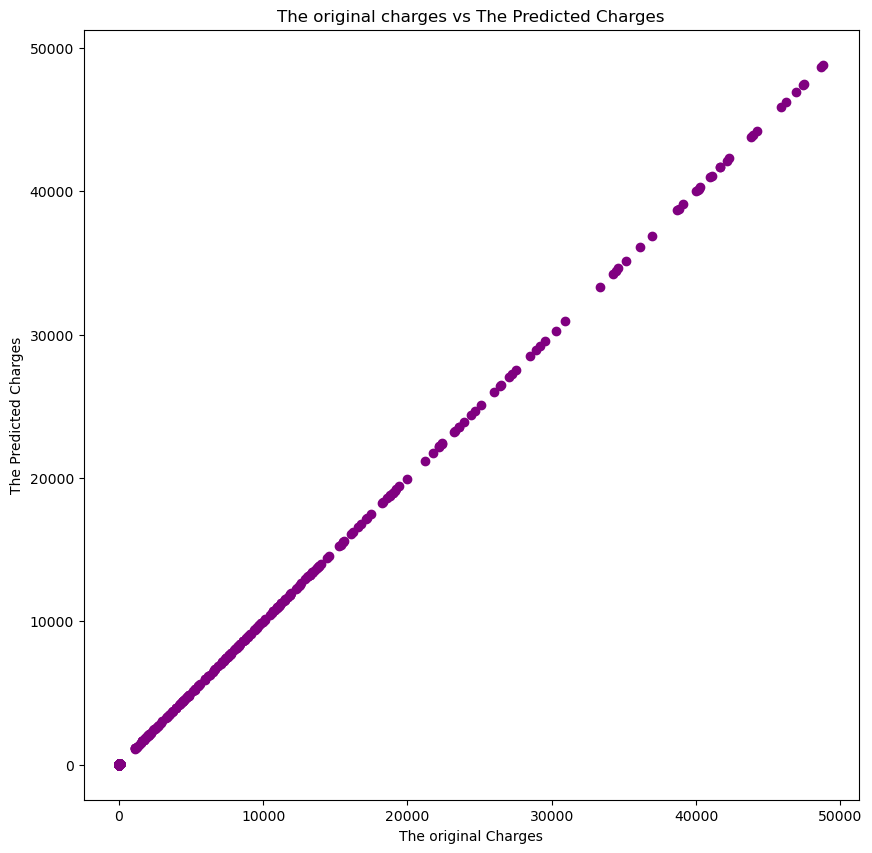

The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00


In [184]:
#using plots to check the accuracy of the model
#using ascatter plot to check the accuracy of the model

#setting the figure size the same as 10 by 10 
plt.figure(figsize=(10,10))

#using scatter plot to check the accuracy of the model
plt.scatter(y_test, y_pred, color='purple')

#setting the x and y axis lables to describe what the scatter plot is about and for easily analysing experience
plt.xlabel('The original Charges')
plt.ylabel('The Predicted Charges')
plt.title('The original charges vs The Predicted Charges')

#displaying the scatter plot for visualisation
plt.show()
#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_test, y_test))

#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_lr.score(X_test, y_test))


### interpreting the data after cross-validation
The ouput remains the same after cross validation. The output is as follows:
    The mean squared error of the model is: 0.00
The coefficient of determination of the model is: 1.00
If the output is 1 then the model accuracy is good and if it is 0, it is not good. 
The score is: 1.0

This suggests that model can predict 

In [185]:
#----------------------------------------------ElasticNet model---------------------------------------------------

### using ElasticNet()
The outcomes of usng the SLR model showed a score of 1 and the scatter plot showed showed a straight line(denoated with a purplpe colour). This suggests that either the model is overfitting therefore the first solution was to implement kfolding and corss-validation which produced an outcome of model score 1.0


The cell below is the implementaion of using the Elasticnet() where the follow happened:
Still using sklearn as the library for accessing machine models , enlasticNet uses an alpha of 0.5. 
The 0.5 in statistics math is the threashold value meaning the probability of the model making an error sits at 5%
the l1 ration represents the Lasso regularisation. 
Th eElasticNet() combination comes into motion where the alpha variable controls the intensity of the regularisation while the L1_ratio balances the L1 and L2 regularisation penaltys. The prediction scores of this model should show a difference compared ot using the SLP model.


In [186]:
#using the imported ElasticNet to create a linear regression object

#creating an object of the ElasticNet  to use for fitting the data
insurance_en=ElasticNet(alpha=0.5,l1_ratio=0.5)

#fitting the training data into the model
insurance_en.fit(X_train, y_train)

#checking the coefficients of the model
print('The coefficients of the model are:',insurance_en.coef_)

#predicting the target variable using the testing data set 
y_pred=insurance_en.predict(X_train)

#calculating the mean square error
print('The mean squared error of the model is: %.2f'% mean_squared_error(X_train, y_pred))

#checking the coefficient of determination of the model
print('If the output is 1 then the model accuracy is good and if it is 0, it is not good', insurance_en.score(X_test, y_test))

The coefficients of the model are: [[ 9.97216674e-01  0.00000000e+00  0.00000000e+00  9.11839835e-07]
 [ 0.00000000e+00  9.86282195e-01 -0.00000000e+00  1.41695767e-06]
 [ 0.00000000e+00 -0.00000000e+00  7.02188865e-01  2.57335774e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.99999997e-01]]
The mean squared error of the model is: 0.03
If the output is 1 then the model accuracy is good and if it is 0, it is not good 0.9775844794573616


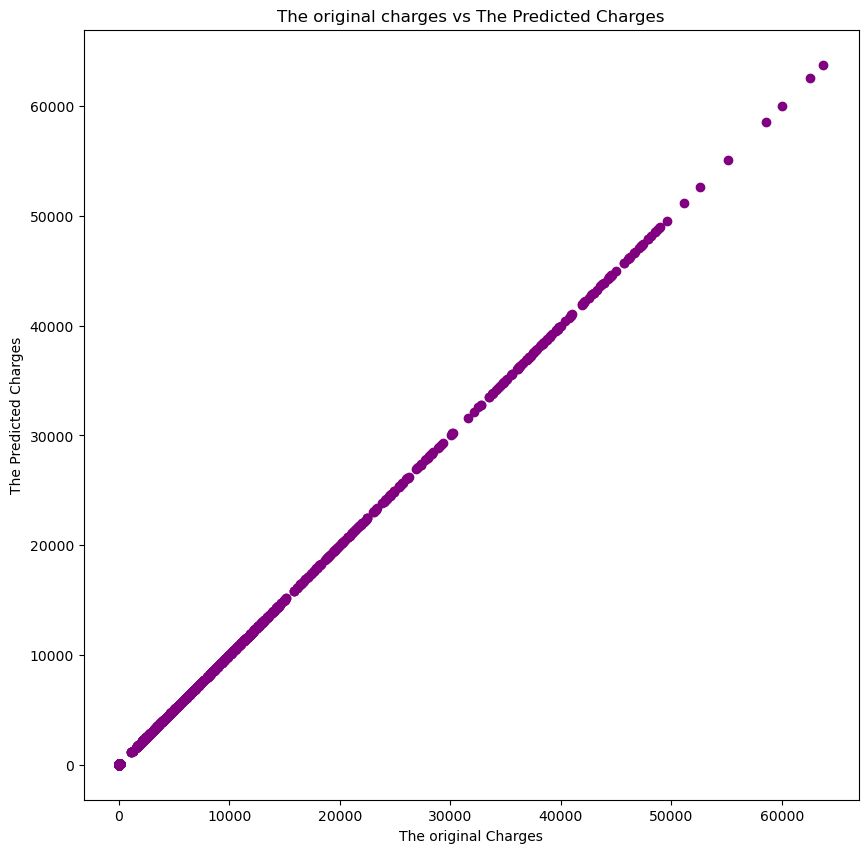

The mean squared error of the model is: 0.03
The coefficient of determination of the model is: 1.00


In [187]:
#using a scatter plot to check the accuracy of the model
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred, color='purple')
plt.xlabel('The original Charges')
plt.ylabel('The Predicted Charges')
plt.title('The original charges vs The Predicted Charges')
plt.show()
#checking the mean squared error of the model
print('The mean squared error of the model is: %.2f'% mean_squared_error(y_train, y_pred))
#checking the Coefficient of determination of the model
print('The coefficient of determination of the model is: %.2f'% insurance_en.score(y_train, y_pred))
#checking the score of the linear regression model based on only the testing data
